In [18]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
import stationary_distribution_aug as sd
import matplotlib as mpl

from scipy.special import gammaincc
from scipy.special import gammainc
from scipy.special import gamma
from scipy.integrate import quad

import seaborn as sns
sns.set_style('whitegrid')

mpl.rcParams['figure.dpi'] = 400
font_size = 10
mpl.rcParams['axes.titlesize'] = font_size
mpl.rcParams['axes.labelsize'] = font_size
mpl.rcParams['xtick.labelsize'] = font_size
mpl.rcParams['ytick.labelsize'] = font_size
mpl.rcParams['legend.fontsize'] = font_size
mpl.rcParams['legend.title_fontsize'] = font_size
inner_font_size = 8

In [19]:
# function to calculate the expected copy for mutator alleles of a given age (discrete derivation)
def expected_extra_mutations_somatic(loci, hs, phi, max_gen = int(1e4)):
    
    mutation_curve = [0]
    cum_survival = [1]

    for gen in np.arange(1, max_gen):
        mutation_curve.append(mutation_curve[gen - 1] * (1/2) + loci * phi)
        exp_x = np.exp(-(mutation_curve[gen - 1])*hs)
        cum_survival.append(cum_survival[-1] * exp_x)

    return cum_survival

In [20]:
# calculate the expected number of extra mutations relative to the expectation at steady state 
tau = 20

# discrete derivation
td = np.linspace(0,tau,tau+2)
yd = 1-(1/2)**td

# continous derivation
tc = np.linspace(0,tau,10*(tau+2))
yc = 1-np.exp(-1/2*tc)

# calculate the effective selection coefficient
# other parameters needed to calculate s*
N = 2000
scaling = N/(20000)
loci = 3e9*0.08*scaling
hs = 20/(2*N)
S_all = np.logspace(1,3,60)

# discrete derivation
sstar = []
for S in S_all:
    phi = S/(2*N*2*loci*hs)
    cum_survival = expected_extra_mutations_somatic(loci=loci,hs=hs,phi = phi)
    sstar.append(1 - sum(cum_survival[1:])/sum(cum_survival[:-1]))

# continuous derivation
alpha = 2*S_all/(2*N)
scont = alpha**alpha/(2*np.exp(alpha)*(gamma(alpha)-gammaincc(alpha,alpha)*gamma(alpha)))

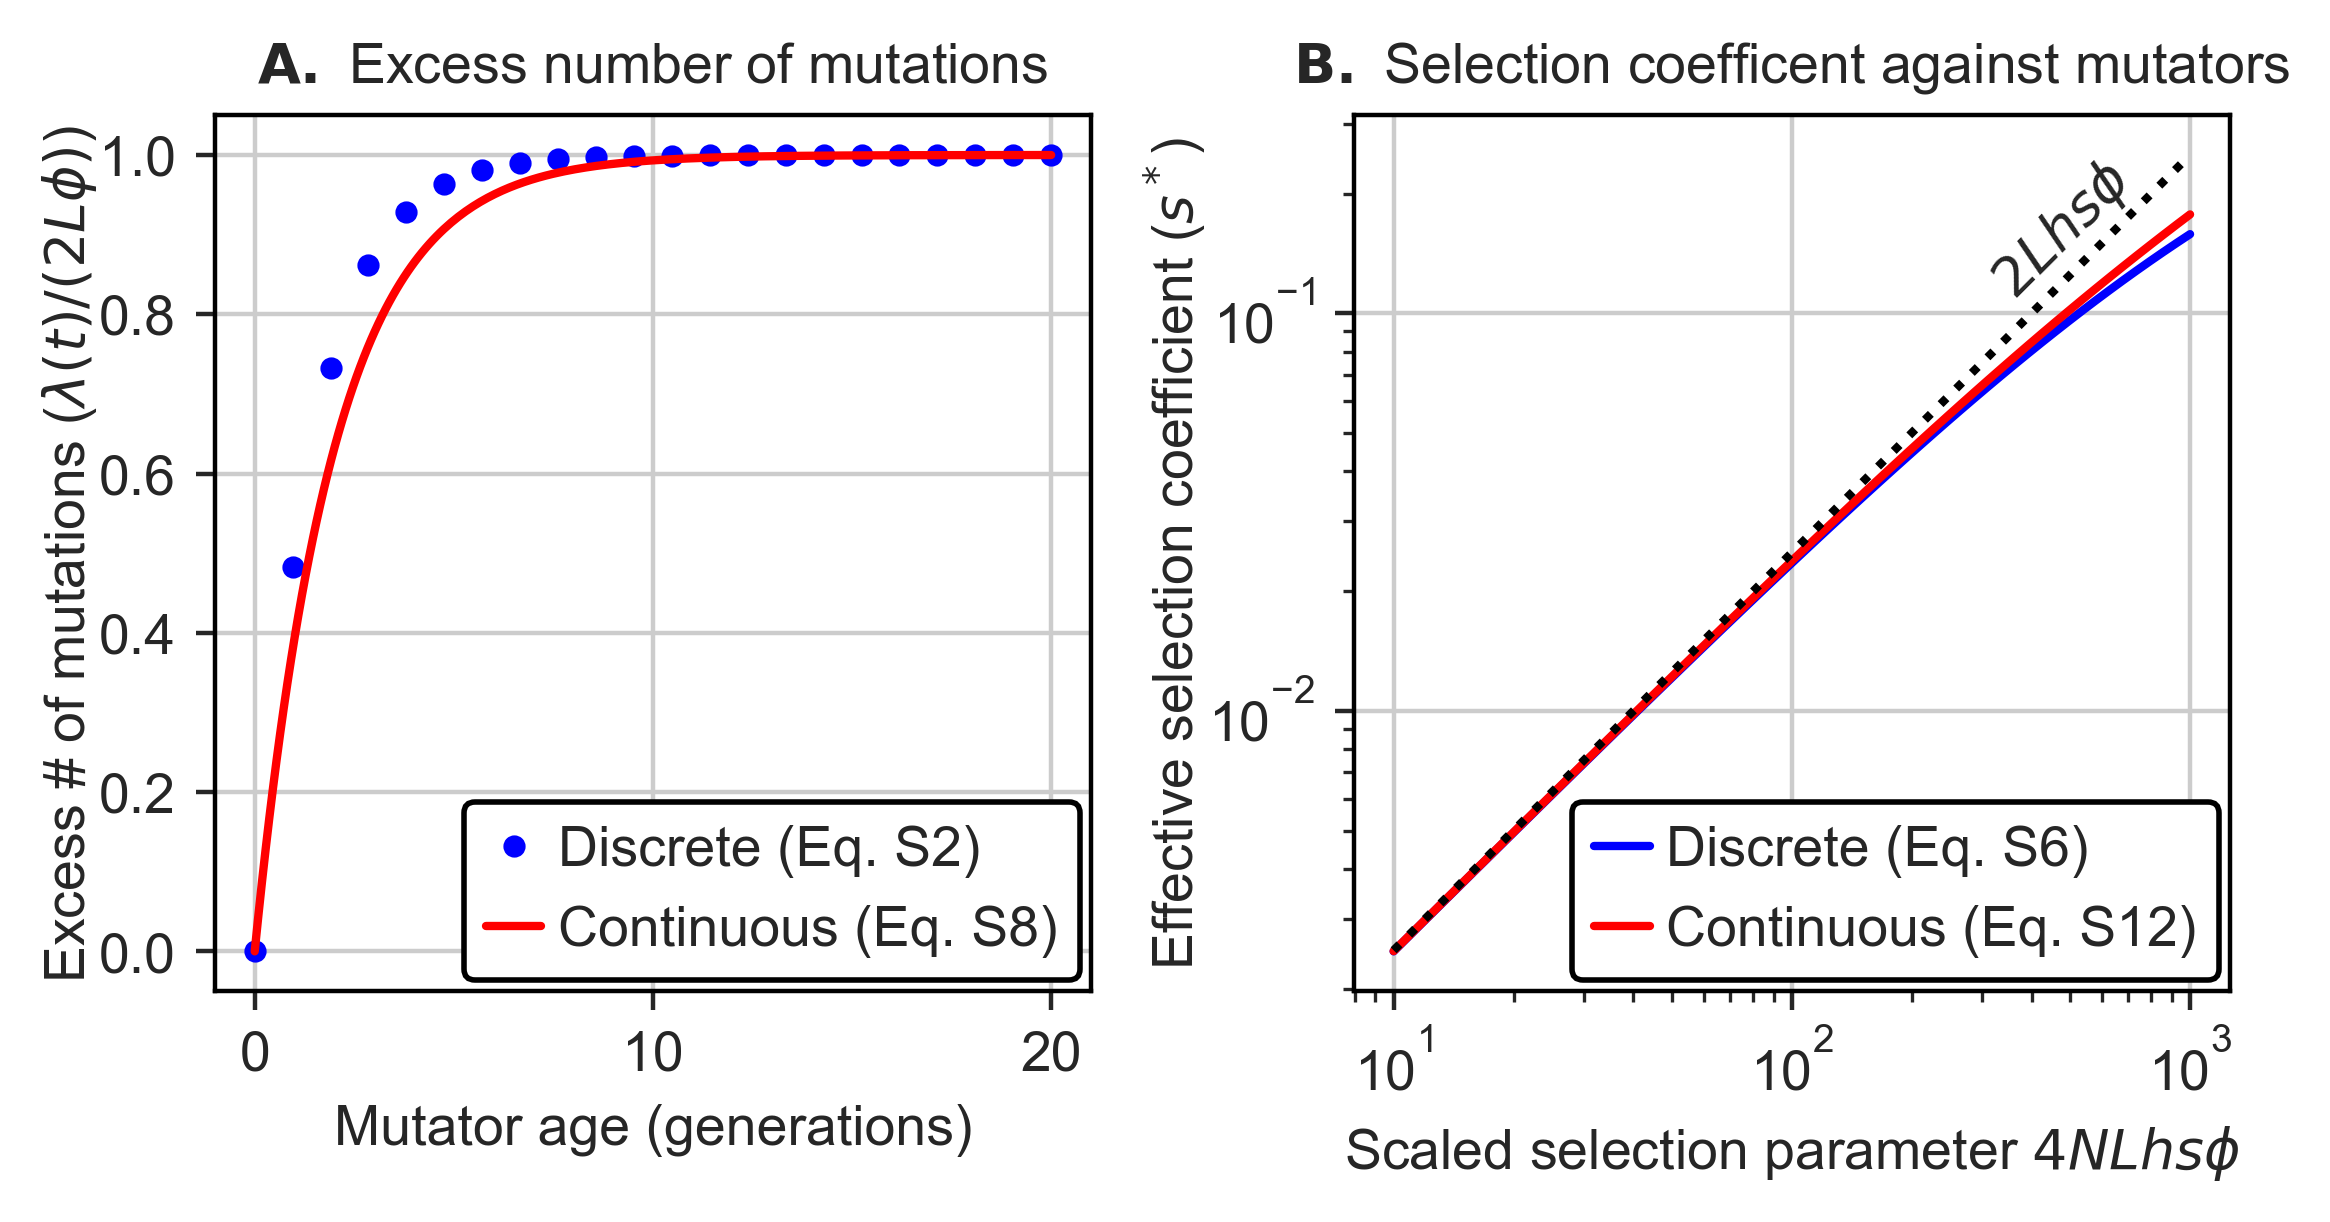

In [30]:
# plotting
fig,(ax1,ax2) = plt.subplots(ncols=2,dpi=400,figsize=(8*6.5/8,3.57*6.5/8))

ax1.plot(td,yd,ls='None',marker='.',color=[0,0,1],label = 'Discrete (Eq. S2)')
ax1.plot(tc,yc,ls='-',color=[1,0,0],label='Continuous (Eq. S8)')
ax1.set_ylabel('Excess # of mutations ($\lambda(t)/(2L\phi)$)',labelpad=0)
ax1.set_xlabel('Mutator age (generations)')
ax1.set_xticks([0,10,20])
ax1.set_title(r'$\bf{A.}$ Excess number of mutations')

ax2.plot(S_all,sstar,color='b',label = 'Discrete (Eq. S6)')
ax2.plot(S_all,scont,color='r',label = 'Continuous (Eq. S12)')
ax2.plot(S_all,S_all/(2*N),color='k',ls=':')
ax2.text(x=3e2,y=1.1e-1,s=r'$2Lhs\phi$',fontsize=10,rotation = 45)
ax2.set_title(r'$\bf{B.}$ Selection coefficent against mutators')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel(r'Scaled selection parameter $4NLhs\phi$')
ax2.set_ylabel('Effective selection coefficient ($s^*$)',labelpad=0)

for ax in [ax1,ax2]:
    ax.tick_params(bottom=True,left=True,labelbottom=True,labelleft=True,which='both')
    for spine in ax.spines.values():
        spine.set_color('k')
    ax.legend(framealpha=1,edgecolor='k',loc='lower right',handlelength=1,handletextpad = 0.3,borderaxespad=0.2)
        
plt.subplots_adjust(wspace=0.3)